In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [2]:
# Load the data
df = pd.read_csv("../Data/synthetic_churn_data.csv")
df

,age,household_income,household_size,tenure_months,monthly_charges,total_spent,num_logins,num_support_tickets,auto_pay,plan_type,contract_type,churn
0,56,102960,1,24,67.47,1619.28,4,10,1,Basic,Monthly,0
1,69,109388,4,7,36.95,258.65,53,3,0,Basic,Monthly,0
2,46,47601,3,34,114.32,3886.88,37,1,1,Premium,Monthly,0
3,32,174092,1,48,27.79,1333.92,61,4,0,Basic,Monthly,1
4,60,164227,6,12,24.54,294.48,24,8,1,Basic,Annual,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,67,235982,5,20,53.98,1079.60,81,5,1,Basic,Annual,0
4996,39,222916,5,10,62.39,623.90,94,10,0,Basic,Monthly,0
4997,46,46301,3,52,96.89,5038.28,81,10,1,Basic,Monthly,0
4998,39,99329,6,18,116.75,2101.50,98,5,1,Basic,Annual,0


In [3]:
print("Shape:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isna().sum())

Shape: (5000, 12)

Data types:
 age                      int64
household_income         int64
household_size           int64
tenure_months            int64
monthly_charges        float64
total_spent            float64
num_logins               int64
num_support_tickets      int64
auto_pay                 int64
plan_type               object
contract_type           object
churn                    int64
dtype: object

Missing values:
 age                    0
household_income       0
household_size         0
tenure_months          0
monthly_charges        0
total_spent            0
num_logins             0
num_support_tickets    0
auto_pay               0
plan_type              0
contract_type          0
churn                  0
dtype: int64


In [4]:
df.describe(include='all')

,age,household_income,household_size,tenure_months,monthly_charges,total_spent,num_logins,num_support_tickets,auto_pay,plan_type,contract_type,churn
count,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.0000,5000.000000,5000.000000,5000,5000,5000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Basic,Monthly,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3008,3538,NaN
mean,46.148600,136928.047400,3.463400,30.59180,79.752884,2419.368768,49.6740,4.999400,0.606000,NaN,NaN,0.086600
std,16.325753,65162.572645,1.712789,17.29737,40.773464,1963.065810,29.2928,3.127772,0.488684,NaN,NaN,0.281276
min,18.000000,25060.000000,1.000000,1.00000,10.020000,10.040000,0.0000,0.000000,0.000000,NaN,NaN,0.000000
25%,32.000000,80617.500000,2.000000,16.00000,44.127500,838.080000,25.0000,2.000000,0.000000,NaN,NaN,0.000000
50%,46.000000,136397.500000,3.000000,30.00000,79.145000,1874.605000,49.0000,5.000000,1.000000,NaN,NaN,0.000000
75%,60.000000,192518.750000,5.000000,46.00000,115.882500,3570.200000,75.0000,8.000000,1.000000,NaN,NaN,0.000000


In [5]:
print(df['churn'].value_counts())
print("\nPercentage distribution:")
print(df['churn'].value_counts(normalize=True) * 100)

churn
0    4567
1     433
Name: count, dtype: int64

Percentage distribution:
churn
0    91.34
1     8.66
Name: proportion, dtype: float64


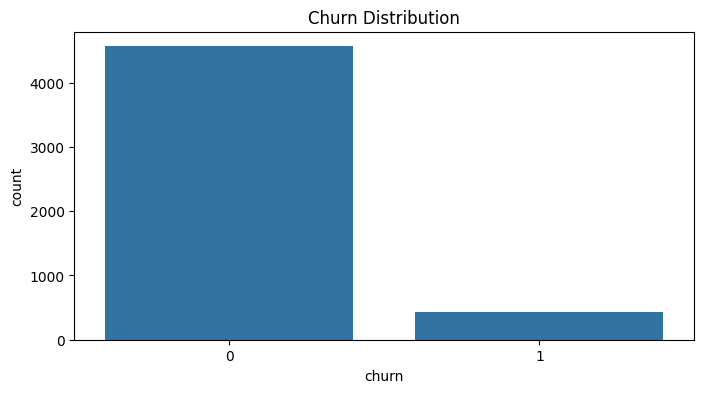

In [7]:
plt.figure(figsize=(8, 4))
sns.countplot(x='churn', data=df)
plt.title("Churn Distribution")
plt.show()

<Figure size 1000x600 with 0 Axes>

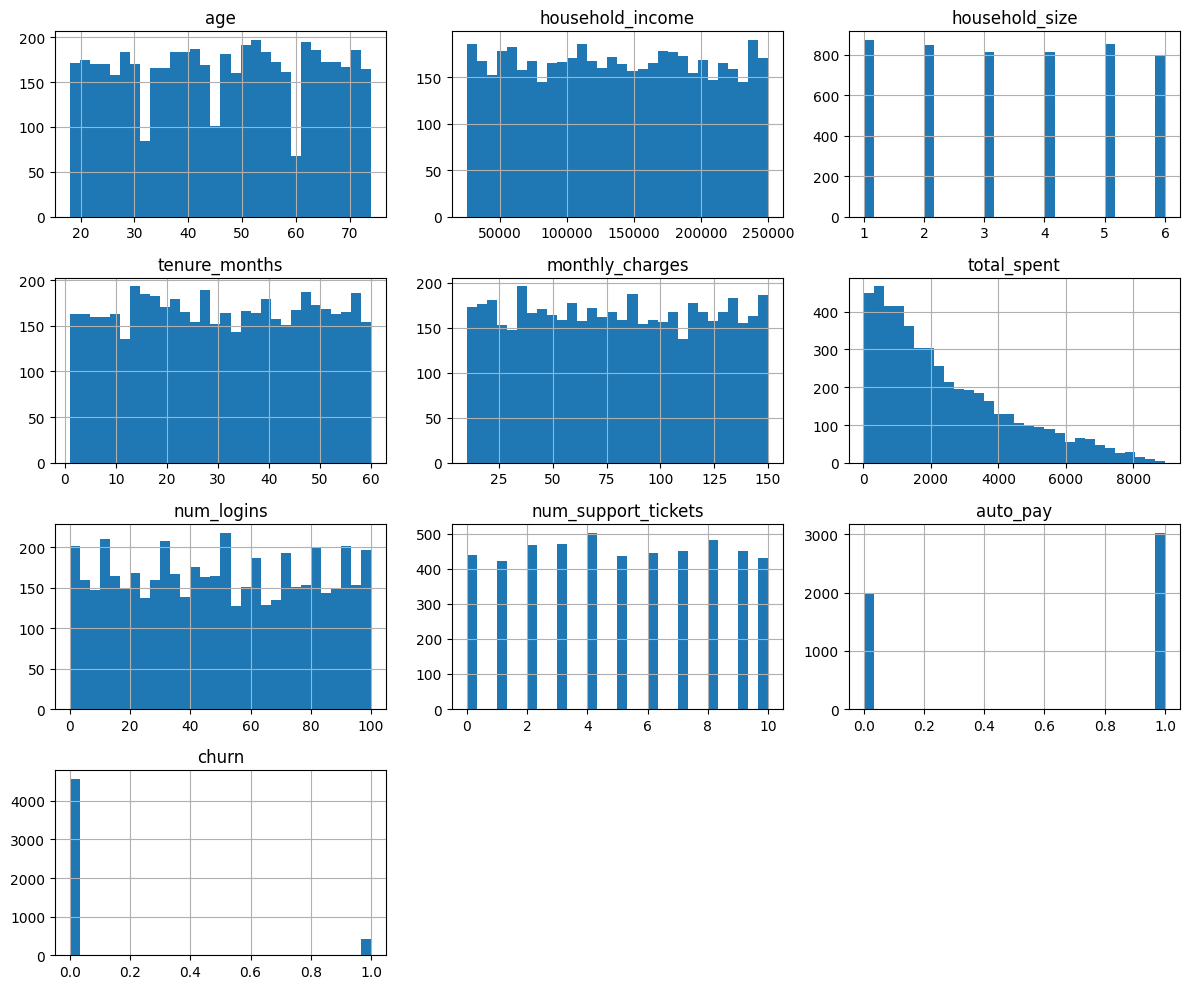

In [8]:
plt.figure(figsize=(10, 6))
df.hist(bins=30, figsize=(12,10))
plt.tight_layout()
plt.show()

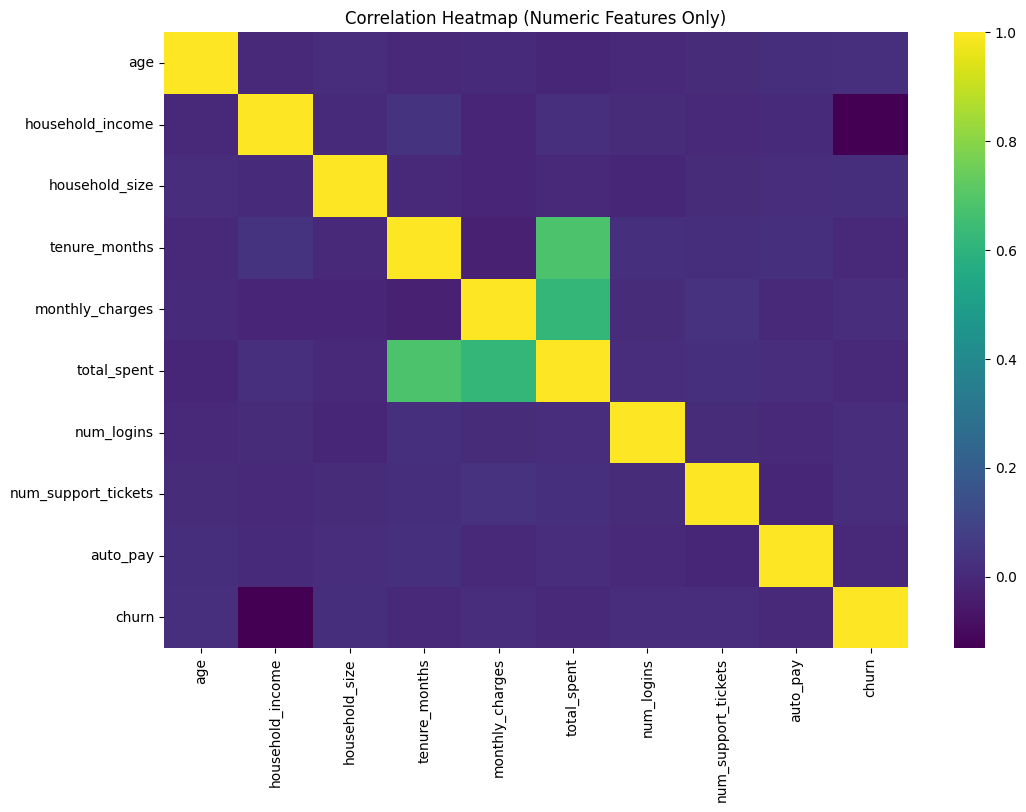

In [10]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=False, cmap='viridis')
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

In [12]:
# Separate features and target
X = df.drop(columns=['churn'])
y = df['churn']

In [13]:
# Identify categorical and numeric columns
categorical_cols = ['plan_type', 'contract_type']
numeric_cols = [col for col in X.columns if col not in categorical_cols]

In [14]:
# Preprocess
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ],
    remainder='passthrough'
)

X_processed = preprocessor.fit_transform(X)

print("Encoded feature shape:", X_processed.shape)

Encoded feature shape: (5000, 12)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (4000, 12)
Test shape: (1000, 12)
